In [5]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [17]:
class logisticRegression:
    def __init__(self, learningRate, numberOfIterations):
        """
        Initialize learning rate, number of iterations, weight, and bias.
        """
        self.learningRate = learningRate
        self.numberOfIterations = numberOfIterations
        self.weight = 0  # Single weight for one feature
        self.bias = 0    # Bias term

    def sigmoid(self, x):
        """
        Sigmoid activation function.
        """
        return 1 / (1 + np.exp(-x))

    def forwardpass(self, x):
        """
        Linear forward pass: y = wx + b
        """
        return self.weight * x + self.bias

    def computeLoss(self, y, y_predicted):
        """
        Compute binary cross-entropy loss.
        y: numpy array of true labels (0 or 1)
        y_predicted: numpy array of predicted probabilities (0 to 1)
        """
        m = len(y)  # Number of samples
        # Add a small epsilon to avoid log(0)
        epsilon = 1e-15
        y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)
        loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
        return loss
    
    def gradientDescent(self, X, y):
        """
        Perform gradient descent to optimize weight and bias.
        X: numpy array of shape (n_samples,) -> input feature
        y: numpy array of shape (n_samples,) -> target labels
        """

        for i in range(self.numberOfIterations):
            # Compute linear output
            linear_output = self.forwardpass(X)
            
            # Apply sigmoid function
            y_predicted = self.sigmoid(linear_output)

            # Compute loss
            if i % 50 == 0:
                loss = self.computeLoss(y, y_predicted)
                print(f"Loss: {loss:.4f}")  # Print loss for each iteration

            # Compute gradients
            dw = (1 / len(X)) * np.dot(X, y_predicted - y)  # Gradient for weight
            db = (1 / len(X)) * np.sum(y_predicted - y)    # Gradient for bias

            # Update parameters
            self.weight -= self.learningRate * dw
            self.bias -= self.learningRate * db

    def predict(self, X):
        """
        Make predictions using the trained model.
        """
        linear_output = self.forwardpass(X)
        probabilities = self.sigmoid(linear_output)
        return [1 if p > 0.5 else 0 for p in probabilities]


In [19]:
X = np.array([1, 2, 3, 4, 5])  # Single feature
y = np.array([0, 0, 0, 1, 1])  # Binary target labels

# Initialize and train the model
model = logisticRegression(learningRate=0.01, numberOfIterations=1000)
model.gradientDescent(X, y)

# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)

Loss: 0.6931
Loss: 0.6668
Loss: 0.6516
Loss: 0.6375
Loss: 0.6240
Loss: 0.6111
Loss: 0.5987
Loss: 0.5868
Loss: 0.5753
Loss: 0.5644
Loss: 0.5538
Loss: 0.5437
Loss: 0.5340
Loss: 0.5246
Loss: 0.5156
Loss: 0.5070
Loss: 0.4986
Loss: 0.4906
Loss: 0.4829
Loss: 0.4754
Predictions: [0, 0, 1, 1, 1]


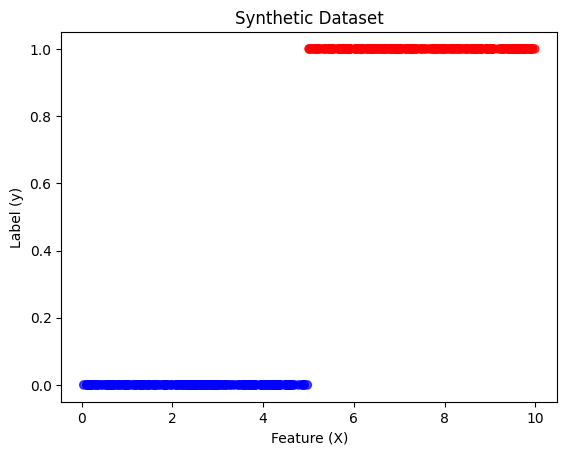

Loss: 0.6931
Loss: 0.5833
Loss: 0.5658
Loss: 0.5494
Loss: 0.5338
Loss: 0.5192
Loss: 0.5053
Loss: 0.4922
Loss: 0.4798
Loss: 0.4681
Loss: 0.4570
Loss: 0.4465
Loss: 0.4365
Loss: 0.4270
Loss: 0.4180
Loss: 0.4095
Loss: 0.4013
Loss: 0.3936
Loss: 0.3862
Loss: 0.3791
Loss: 0.3724
Loss: 0.3659
Loss: 0.3598
Loss: 0.3539
Loss: 0.3482
Loss: 0.3428
Loss: 0.3376
Loss: 0.3327
Loss: 0.3279
Loss: 0.3233
Loss: 0.3188
Loss: 0.3146
Loss: 0.3105
Loss: 0.3065
Loss: 0.3027
Loss: 0.2990
Loss: 0.2954
Loss: 0.2920
Loss: 0.2886
Loss: 0.2854


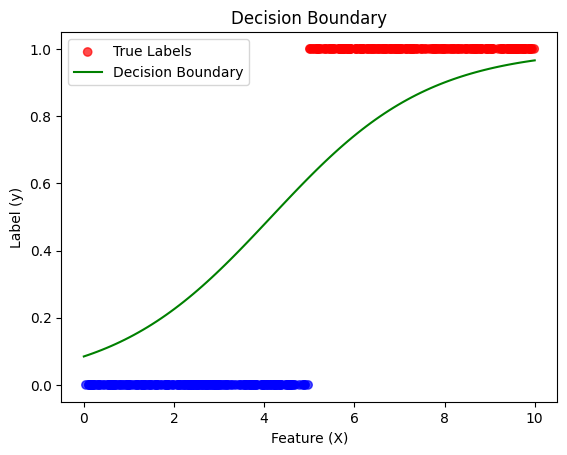

In [23]:
np.random.seed(0)  # For reproducibility
n_samples = 500
X = np.random.rand(n_samples) * 10  # Feature values between 0 and 10
y = (X > 5).astype(int)  # Binary labels: 0 if X <= 5, 1 if X > 5

# Visualize the dataset
plt.scatter(X, y, c=y, cmap="bwr", alpha=0.7)
plt.xlabel("Feature (X)")
plt.ylabel("Label (y)")
plt.title("Synthetic Dataset")
plt.show()

# Train the logistic regression model
model = logisticRegression(learningRate=0.01, numberOfIterations=2000)
model.gradientDescent(X, y)

# Make predictions
predictions = model.predict(X)

# Visualize decision boundary
plt.scatter(X, y, c=y, cmap="bwr", alpha=0.7, label="True Labels")
decision_boundary_x = np.linspace(0, 10, 100)
decision_boundary_y = model.sigmoid(model.weight * decision_boundary_x + model.bias)
plt.plot(decision_boundary_x, decision_boundary_y, color="green", label="Decision Boundary")
plt.xlabel("Feature (X)")
plt.ylabel("Label (y)")
plt.legend()
plt.title("Decision Boundary")
plt.show()